In [16]:
import numpy as np
from PIL import Image

In [17]:
def array_from_img(img):
    img.load()
    return np.asarray( img, dtype="uint32" )
def load_image( infilename ):
    return Image.open( infilename).convert("RGB")

def img_from_array(npdata):
    return Image.fromarray( np.asarray( npdata, dtype="uint8"), "RGB" )

def save_image( img, outfilename ) :
    img.save( outfilename )
    
    
def to_lt24 (arr):
    #down size
    lt24_arr = np.copy(arr) >> np.array([3,2,3]) 
    # bgr format , all bgr in one pixel
    temp = (lt24_arr[:,:,0]<<11) + (lt24_arr[:,:,1]<<5) + (lt24_arr[:,:,2])
    # 2 pixels in one word 
    temp2 = np.array(temp.reshape((240,160,2)),dtype="uint32")
    temp3 = (temp2[:,:,1]<<16)+temp2[:,:,0]
    # 1-D array
    return temp3.reshape((38400,1))[:,0]
    
def from_lt24 (lt24):
    #reverse function to_lt24
    temp = lt24.reshape((240,160))
    temp2 = np.zeros((240,160,2),dtype="uint32")
    temp2[:,:,1] = temp >>16
    temp2[:,:,0] = temp % (1<<16)
    temp3 = temp2.reshape((240,320))    
    result = np.zeros((240,320,3),dtype="uint32")
    result[:,:,0]= temp3>>11
    result[:,:,1] = (temp3>>5) % (1<<6)
    result[:,:,2] = temp3 % (1<<5)
    return result << np.array([3,2,3])   

def to_file(lt24, path):    
    f = open(path, 'wb')
    for line in lt24:    
        f.write(line.newbyteorder().tobytes())
    f.close()
    
def from_file(path):
    f = open(path, 'rb')
    b = f.read()
    return np.frombuffer(b, dtype='uint32', count=-1, offset=0).newbyteorder()
    

In [18]:
path = './pics/lakeside.png'

In [19]:
img = load_image(path)

In [20]:
arr = array_from_img(img)

In [21]:
lt24 = to_lt24(arr)
lt24[-3]

9240750

In [22]:
path_file = './files/lakeside.bin'

In [23]:
to_file(lt24, path_file)

In [24]:
lt24_rec = from_file(path_file)

In [25]:
arr_rec = from_lt24 (lt24_rec)

In [26]:
img_out = img_from_array(arr_rec)

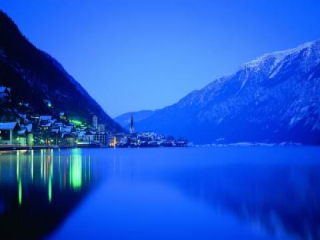

In [27]:
img

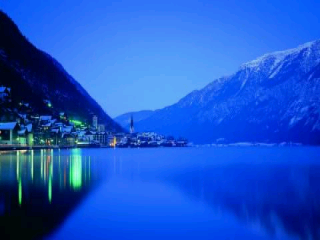

In [28]:
img_out

In [29]:
out_path = './pics/lakeside_out.png'

In [30]:
save_image( img_out, out_path) 